In [18]:
# Load packages 
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
%matplotlib inline
#import theano
#print theano.config
#np.__config__.show()

Here we train a modernized version of LetNet5 [1] in the mnist dataset
This code is modified from keras https://github.com/fchollet/keras/blob/master/examples/ visits this site for more info

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using Theano backend.


In [3]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#reshape the data
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype("float32")
X_train = X_train.astype("float32")
X_train /= 255
X_test /= 255
print('Training data', X_train.shape)
print(X_train.shape[0], "Training example")
print(X_test.shape[0], "Test example")


('Training data', (60000L, 1L, 28L, 28L))
(60000L, 'Training example')
(10000L, 'Test example')


In [5]:
# Convert class vector to binary class metirces
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_train, nb_classes)
print("One hot encoding {}".format(y_train[0:]))

One hot encoding [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


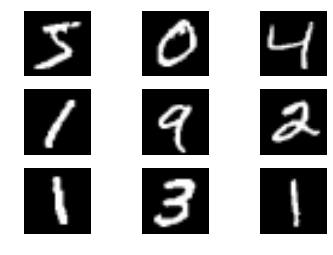

In [6]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,0], cmap='gray')
    plt.axis("off")

In [7]:
model = Sequential()
#Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))

model.add(Convolution2D(6,5,5, input_shape=(1, img_rows, img_cols), border_mode='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(16,5,5,border_mode='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(120,5,5,border_mode='same'))
model.add(Activation("relu"))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(84))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [23]:
#from keras.optimizers import SGD
#sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

ERROR (theano.gof.opt): Optimization failure due to: local_abstractconv_check
ERROR (theano.gof.opt): node: AbstractConv2d{border_mode='half', subsample=(1, 1), filter_flip=True, imshp=(None, 1, 28, 28), kshp=(6, 1, 5, 5)}(<TensorType(float32, 4D)>, convolution2d_W)
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "C:\Users\ritraina\Anaconda2\lib\site-packages\theano\gof\opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "C:\Users\ritraina\Anaconda2\lib\site-packages\theano\tensor\nnet\opt.py", line 402, in local_abstractconv_check
    node.op.__class__.__name__)
AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?



AssertionError: AbstractConv2d Theano optimization failed: there is no implementation available supporting the requested options. Did you exclude both "conv_dnn" and "conv_gemm" from the optimizer? If on GPU, is cuDNN available and does the GPU support it? If on CPU, do you have a BLAS library installed Theano can link against?

In [ ]:
nb_epoch = 2  # try increase this number 

model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
result = model.predict_classes[X_test[:9]]
plt.figure(figuresize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[1,0], cmap='gray')
    plt.gca.getxaxis.set_ticks([])
    plt.gca.getyaxis.set_ticks([])
    plt.ylabel("prediction = %d" % result[i], fontsize=18)
    